# Nama    : Novan Surya Putra
# Devisi   : Data Analyst
# Project  : Green Emission



#### latar Belakang

Alasan project ini dilakukan tidak jauh dan tidak lebih dikarenakan polusi udara yang semakin meningkat di beberapa kota di indonesia
hal tersebut dapat diliat dari beberapa sumber data dan artikel. salah satunya adalah article berikut https://www.metrojambi.com/lifestyle/13802320/ini-10-kota-di-indonesia-dengan-polusi-udara-tinggi-bagaimana-dengan-surabaya
    yang dimana memberikan informasi bahwa polusi udara semakin meningkat di beberpaa kota besar di indoensia.
    Oleh karena itu, project ini dilakukan agar memberikan manfaat untuk masyarakat untuk mengetahui kendaraan yang mereka gunakan
    memiliki emisi yang tinggi atau rendah sehingga dapat meminimalisir terjadinya emisi.

#### Metode
 Dalam project ini Prediksi menggunakan metode Supervised Learning (Linear Regression) yang mana dengan metode ini kita dapat mengkaji pendekatan dan ketergantungan antara Variable terikat yaitu Y dan variable bebas yaitu X yang terdiri dari satu atau lebih. Pada project ini kita menggunakan Multi Linear Regression dikarenakan kita memiliki satu nilai Y dan memiliki lebih dari 1 nilai X sehingga Multi Linear adalah metode yang pas digunakan
 
 ####  persamaan 
$$Y = b + e + m_1x_1 + m_2x_2 + \ldots + m_nx_n$$
- Y = Dependent variable
- m_n = Coefficients and equation
- x_n = Independent variables
- b = Intercept
- e = Error

#### Hasil

Hasil yang diharapkan ketika dilakukan ialah, berharap bahwa kendaraan yang digunakan oleh pengandara memiliki nilai emisi dibawah 120 g/km^2. agar kualitas lingkungan tidak tercemar dan kualitas udara tetap terjaga


In [44]:
# Memanggil Library yang akan digunakan untuk analisis data 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

### Load Dataset

In [45]:
df=pd.read_csv("CO2 Emissions_Canada.csv")

In [46]:
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


### Data Preparation

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [48]:
df.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


In [49]:
df.shape

(7385, 12)

In [50]:
print(df.isnull().sum())

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64


### Data Cleaning

In [51]:
#pengecekan data duplikasi
df.duplicated().sum()

1103

##### Dari data yang didapatkan terdapat 1103 data duplikasi sehingga perlunya kita melakukan penghapusan data agar data yang di analisis akurat

In [52]:
#menghapus data duplicates
df.drop_duplicates()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232


##### Setelah di hapus data duplicates maka tersisa 6282 data dengan 12 columns

In [53]:
#drop kolom yang tidak dibutuhkan
df.drop(columns=['Transmission'],inplace=True)
df.drop(columns=['Fuel Type'],inplace=True)

##### tiga kolom tersebut di hapus karena tidak memiliki pangaruh yang signikfikan dalam prediksi suatu emisi

In [54]:
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,12.1,8.7,10.6,27,244


# Exploratory Data Analyst


C:\Users\ree\AppData\Local\Temp\ipykernel_15872\1324626046.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='CO2 Emissions(g/km)', ylabel='Density'>

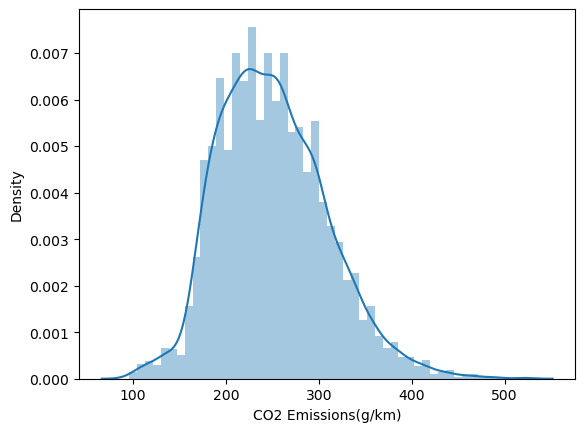

In [55]:
#analisis Emisi co2
sns.distplot(df["CO2 Emissions(g/km)"])

###### ANALISIS : dari grafik Emisi CO2 diatas, kita mendapatkan insight bahwa emisinya memiliki range di angak 200-300 g/km adalah paling banyak

<Axes: >

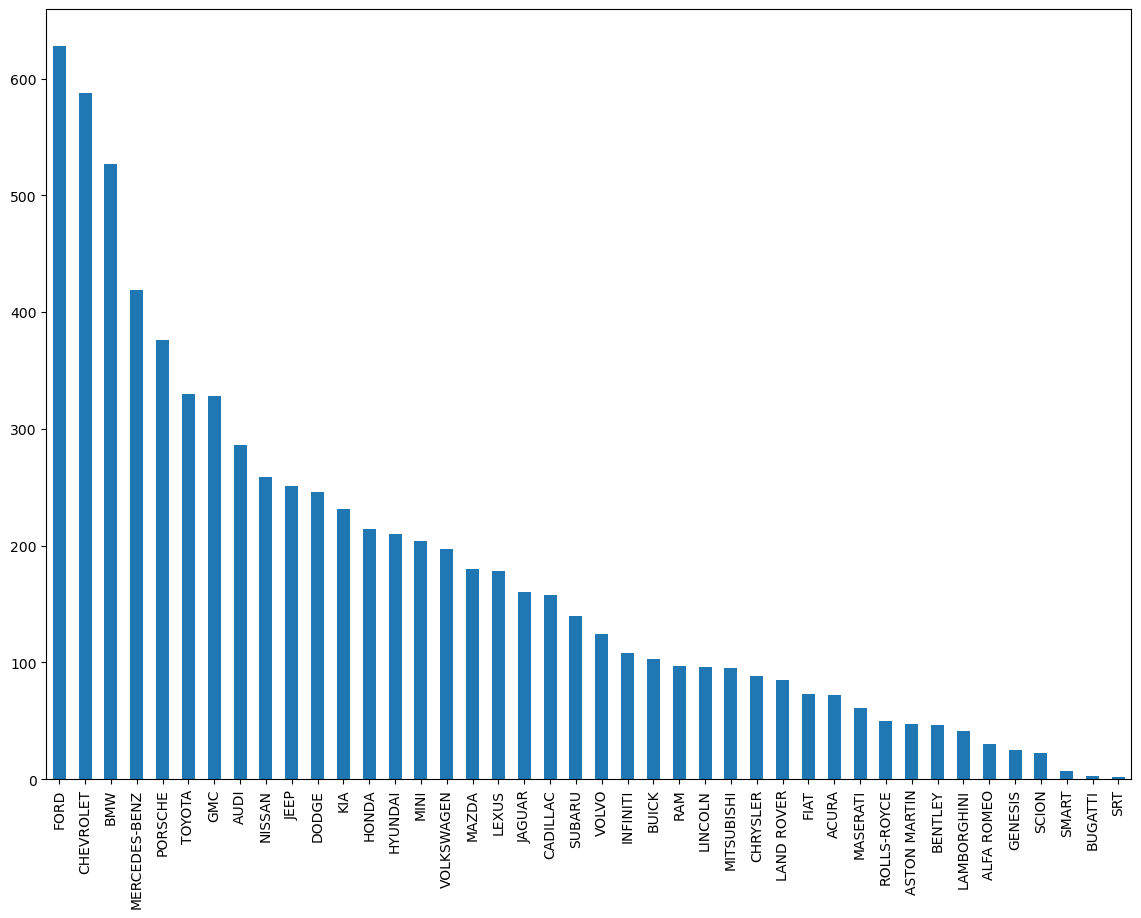

In [56]:
df['Make'].value_counts().plot(kind='bar',figsize=(14,10))

###### ANALISIS : dari grafik bar di atas menggambarkan merek kendaraan yang paling banyak digunakan di wilayah canada, dengan merek terbanyak digunakan yaitu Ford, Chevrolet, BMW dan tiga terbawah yaitu Smart, Bugatti, dan SRT

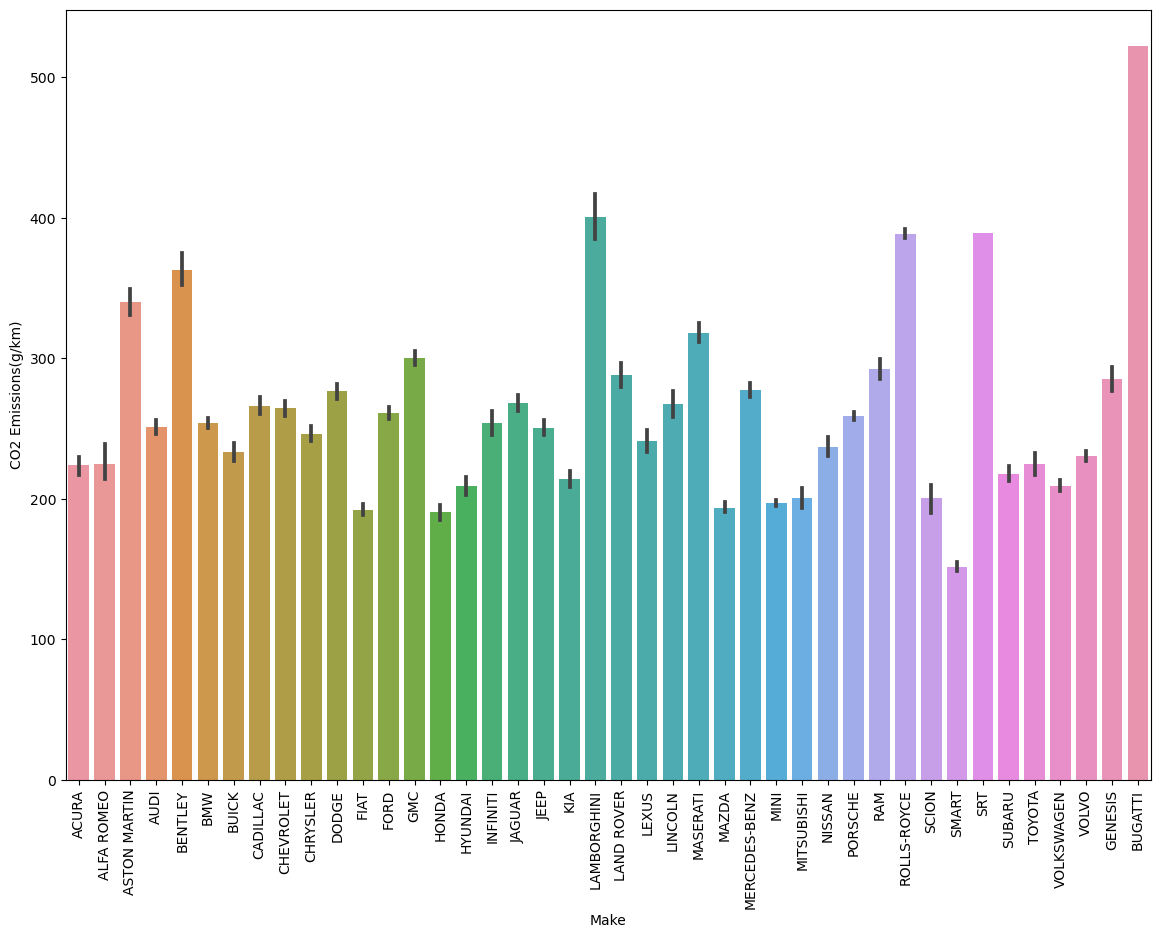

In [57]:
plt.figure(figsize=(14, 10))
sns.barplot(x=df['Make'], y=df['CO2 Emissions(g/km)'])
plt.xticks(rotation='vertical')
plt.show()

###### Analisis :  Dari analisis yang dilakukan kita mendapatkan insight bahwa Bugatti adalah merek paling tinggi yang mengeluarkan emisi, dmana nilainya hampir di angka 500 g/km 

<Axes: >

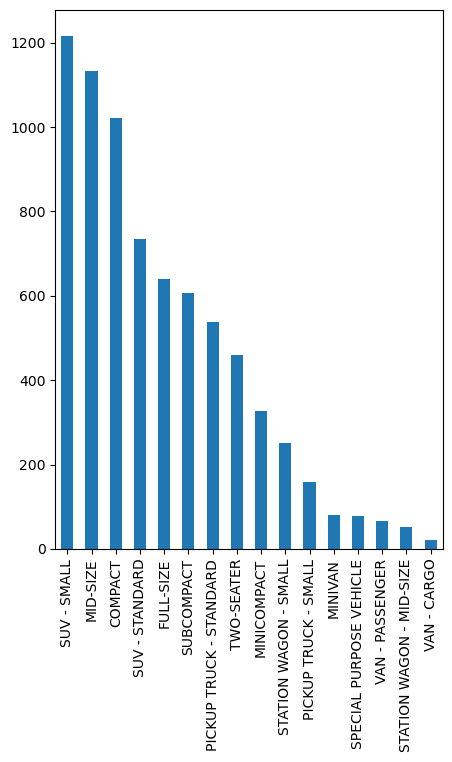

In [58]:
df['Vehicle Class'].value_counts().plot(kind='bar',figsize=(5,7))

###### ANALISIS : Dari data diatas kita melihat bahwa jenis kendaraan yang paling banyak adalah suv small yang berada di atas 1200 kendaraan dan di ikuti oleh Mid-size dan Compact yang berada di angka 1000an namun masih dibawah 1200.

<function matplotlib.pyplot.show(close=None, block=None)>

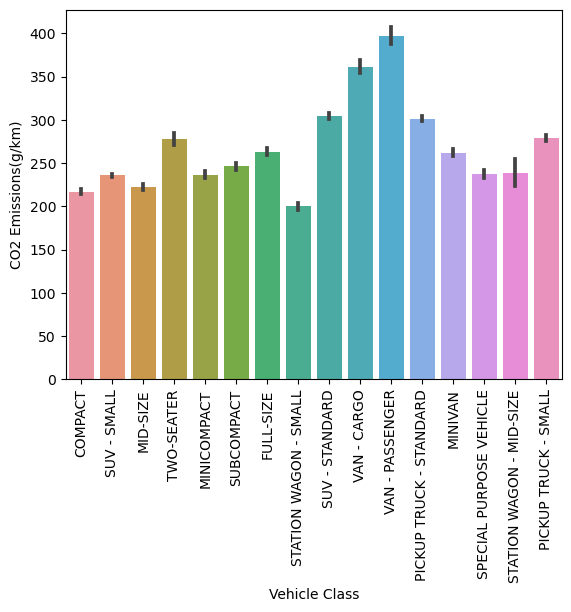

In [59]:
# Nilai Emisi dari tiap kelas kendaraan
sns.barplot(x=df['Vehicle Class'], y=df['CO2 Emissions(g/km)'])
plt.xticks(rotation="vertical")
plt.show

#### 
Analisis : dari bar diatas kita mengetahui bahwa kelas kendaraan dengan nama "Van-pasasenger" adalah kelas atau jenis kendaraan yang paling tinggi menyumbang emisi pada bumi


C:\Users\ree\AppData\Local\Temp\ipykernel_15872\2871329112.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='Engine Size(L)', ylabel='Density'>

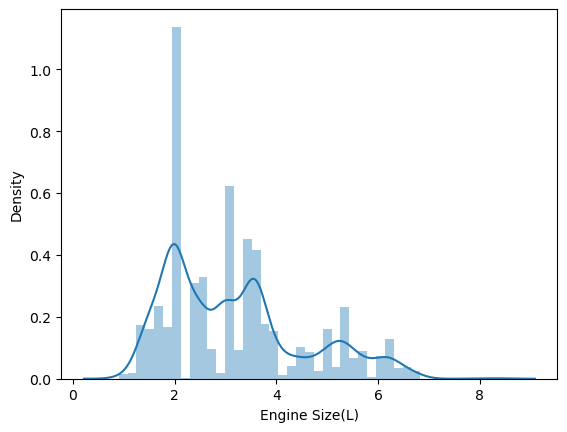

In [60]:
sns.distplot(df['Engine Size(L)'])

####
Analisis : Fungsi density pada Engine Size untuk melihat ukuran atau Size Engine pada kendaraan, yang mana dapat dilihat bahwa Engine Size dengan ukuran "2" adalah paling banyak digunakan 

In [61]:
import plotly.express as px
import plotly.graph_objects as go
figure = px.scatter(data_frame = df, x= "CO2 Emissions(g/km)", y="Engine Size(L)", size="Engine Size(L)", trendline="ols")
figure.show()

#### 
Analisis : perbandingan antara 2 variable yang memiliki hubungan dimana Engine Size (L) Semakin besar maka emisi yang dihasilkan semakin tinggi

In [62]:
figure = px.scatter(data_frame = df, x= "CO2 Emissions(g/km)", y="Cylinders", size="Cylinders", trendline="ols")
figure.show()

#### 
Analisis : garis trendline pada Cylinders menunjukkan bahwa semakin tinggi nilai cylinders akan semkain tinggi pula tingkat emsisi yang dihasilkan

In [63]:
#korelasi
correlation = df.corr()
print(correlation["CO2 Emissions(g/km)"].sort_values(ascending=False))

CO2 Emissions(g/km)                 1.000000
Fuel Consumption City (L/100 km)    0.919592
Fuel Consumption Comb (L/100 km)    0.918052
Fuel Consumption Hwy (L/100 km)     0.883536
Engine Size(L)                      0.851145
Cylinders                           0.832644
Fuel Consumption Comb (mpg)        -0.907426
Name: CO2 Emissions(g/km), dtype: float64


C:\Users\ree\AppData\Local\Temp\ipykernel_15872\2168238622.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



C:\Users\ree\AppData\Local\Temp\ipykernel_15872\2066372499.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

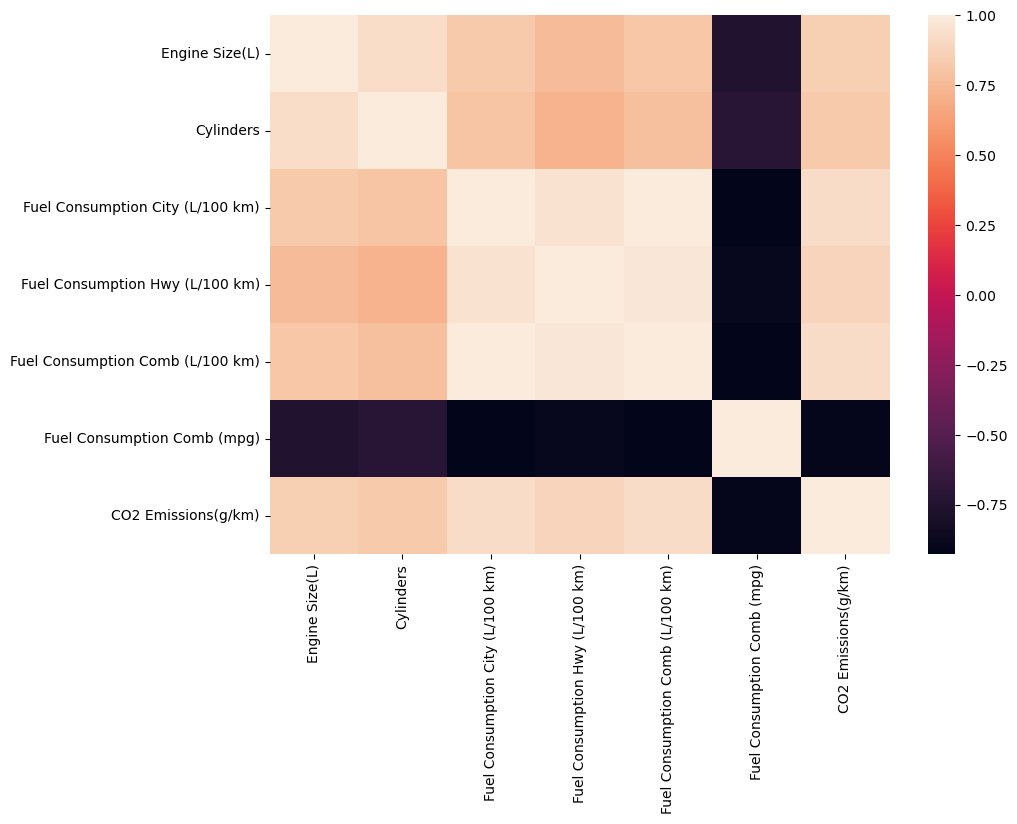

In [64]:
plt = plt.figure(figsize=(10,7))
sns.heatmap(df.corr())

In [65]:
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,12.1,8.7,10.6,27,244


C:\Users\ree\AppData\Local\Temp\ipykernel_15872\2278088795.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='Fuel Consumption Comb (mpg)', ylabel='Density'>

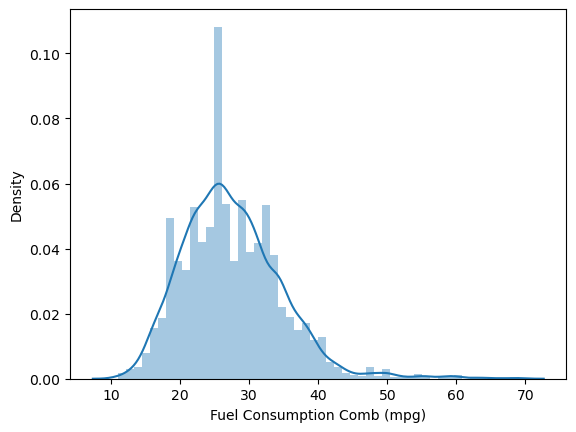

In [66]:
sns.distplot(df['Fuel Consumption Comb (mpg)'])

<Figure size 1000x700 with 0 Axes>

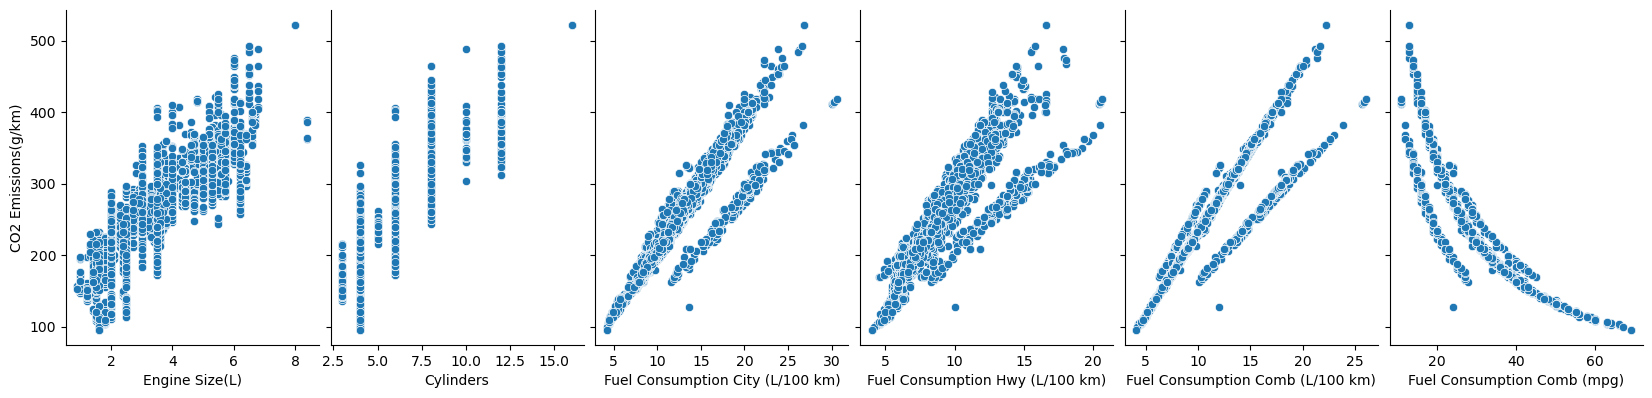

In [67]:
#### Bivariate analyst antara independent variable dan dependent variable
#### melihat hubungan antara independent dan dependent
#### Menggunakan pairplot

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,7))
sns.pairplot(data=df, x_vars=['Engine Size(L)','Cylinders','Fuel Consumption City (L/100 km)','Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)','Fuel Consumption Comb (mpg)'], y_vars=['CO2 Emissions(g/km)'], height=4, aspect=0.7)
plt.show()

In [68]:
# mengetahui nilai korelasi dari independent variable dan dependent variable
df.corr().style.background_gradient().set_precision(2)

C:\Users\ree\AppData\Local\Temp\ipykernel_15872\3378323878.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

C:\Users\ree\AppData\Local\Temp\ipykernel_15872\3378323878.py:2: FutureWarning:

this method is deprecated in favour of `Styler.format(precision=..)`



,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
Engine Size(L),1.00,0.93,0.83,0.76,0.82,-0.76,0.85
Cylinders,0.93,1.00,0.80,0.72,0.78,-0.72,0.83
Fuel Consumption City (L/100 km),0.83,0.80,1.00,0.95,0.99,-0.93,0.92
Fuel Consumption Hwy (L/100 km),0.76,0.72,0.95,1.00,0.98,-0.89,0.88
Fuel Consumption Comb (L/100 km),0.82,0.78,0.99,0.98,1.00,-0.93,0.92
Fuel Consumption Comb (mpg),-0.76,-0.72,-0.93,-0.89,-0.93,1.00,-0.91
CO2 Emissions(g/km),0.85,0.83,0.92,0.88,0.92,-0.91,1.00


# korelasi antara variable bebas terhadap variable terikat


### modeling

In [69]:
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,12.1,8.7,10.6,27,244


In [70]:

df.drop(columns=['Make','Model','Vehicle Class'],inplace=True)

In [71]:
df.head()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,2.0,4,9.9,6.7,8.5,33,196
1,2.4,4,11.2,7.7,9.6,29,221
2,1.5,4,6.0,5.8,5.9,48,136
3,3.5,6,12.7,9.1,11.1,25,255
4,3.5,6,12.1,8.7,10.6,27,244


In [72]:
x = df.drop(columns='CO2 Emissions(g/km)')
y = df['CO2 Emissions(g/km)'] 

In [73]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2,random_state=4)

In [74]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(5908, 6)
(5908,)
(1477, 6)
(1477,)


In [75]:
#membuat tabel objek regrresion
lin_reg = LinearRegression()

In [76]:
# train data menggunakan data yang sudah di split
lin_reg.fit(x_train, y_train)

LinearRegression()

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd

# Assuming you have loaded your dataset into a DataFrame called df
# df should contain your features (independent variables) and target variable (dependent variable)

# Splitting the data into training and testing sets
X = df.drop(columns=['CO2 Emissions(g/km)'])  # Features (independent variables)
y = df['CO2 Emissions(g/km)']  # Target variable (dependent variable)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Evaluating the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # Calculating RMSE by setting squared=False
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", r2)


Mean Absolute Error (MAE): 11.530719771854937
Mean Squared Error (MSE): 337.4608996974323
Root Mean Squared Error (RMSE): 18.370108864604813
R-squared (R2) Score: 0.9018902750130587


In [78]:
#mencari tau nilai slope/koefesien m dan intercept b
print(lin_reg.coef_)
print(lin_reg.intercept_)

[ 4.81845957  7.46823824 -1.0866407   3.77811474  3.63084005 -3.39344284]
226.39758557601596


In [79]:
# membuat lebih rapi dataframe
coef_dict={
    'feature':x.columns,
    'coef_value': lin_reg.coef_
}
coef=pd.DataFrame(coef_dict, columns=['feature', 'coef_value'])
coef

,feature,coef_value
0,Engine Size(L),4.818460
1,Cylinders,7.468238
2,Fuel Consumption City (L/100 km),-1.086641
3,Fuel Consumption Hwy (L/100 km),3.778115
4,Fuel Consumption Comb (L/100 km),3.630840
5,Fuel Consumption Comb (mpg),-3.393443


In [80]:
y_pred = lin_reg.predict(x_test)

In [81]:
lin_reg.score(x_test,y_test)

-0.9248652022208681

In [87]:
# Hasil prediksi dari regresi linear
hasil_prediksi = lin_reg.predict([[.0, 1, 1, 1, 1, 1]])

# Buat fungsi untuk menentukan "Aman" atau "Berbahaya"
def klasifikasi_emisi(hasil_prediksi):
    if hasil_prediksi > 120:
        return "Berbahaya"
    else:
        return "Aman"

# Gunakan fungsi untuk menentukan status emisi
status_emisi = klasifikasi_emisi(hasil_prediksi)

# Tampilkan status emisi
print("Status Emisi:", status_emisi)



NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [43]:
# Creating and training the linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Saving the model using pickle
filename = "Emisi.sav"
with open(filename, 'wb') as file:
    pickle.dump(lr, file)

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.